# ***APLICAÇÃO DO AUTOENCODER UTILIZANDO O DATASET MNIST COM KERAS E POSTERIOR CLASSIFICAÇÃO DOS DADOS PROCESSADOS***

**-> IMPORTAÇÃO DAS BIBLIOTECAS**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from keras.layers import Dense, Input, Activation, Dropout
from keras.models import Model
from keras.models import Sequential

**-> CARREGAMENTO E TRATAMENTO DOS DADOS**

In [ ]:
# Carregando o conjunto de dados MNIST
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

print(x_train.shape)
print(x_test.shape)

valMax = x_train.max()

# Normalizando os valores dos pixels para o intervalo [0, 1]
x_train = x_train / valMax
x_test = x_test / valMax

# Transformando as imagens em vetores unidimensionais (784 pixels)
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Aplicação de ruído nos dados e armazenando em variáveis acessórias
factor = 0.1
x_train_noisy = x_train + factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(10000, 784)


-> VISUALIZAÇÃO DE ALGUMAS IMAGENS PARA TREINAMENTO

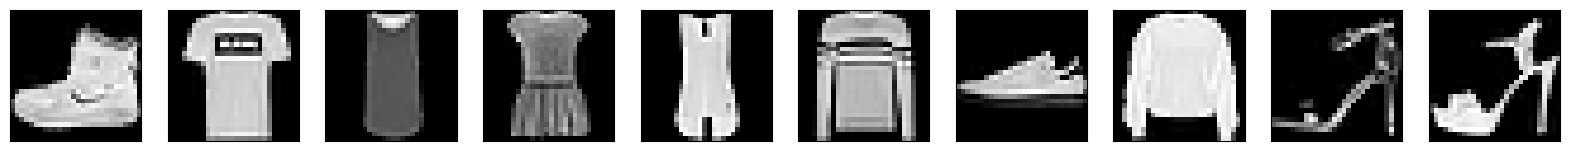

In [ ]:
# Visualizando algumas imagens originais
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Imagem de entrada com ruído
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_train[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

**-> CONSTRUÇÃO DO MODELO AUTOENCODER COM DADOS ORIGINAIS**

In [ ]:
# Definindo a dimensão da representação codificada
n_latent = 90

# Criando o modelo do autoencoder
model = Sequential()
model.add(Dense(units = 600, input_dim=x_train.shape[1], activation="relu"))
model.add(Dense(units = 300, activation="relu"))
model.add(Dense(units = n_latent, activation="relu"))
model.add(Dense(units = 300, activation="relu"))
model.add(Dense(units = 600, activation="relu"))
model.add(Dense(units = x_train.shape[1], activation="sigmoid"))

# Compilando o modelo
model.compile(optimizer='adam', loss='binary_crossentropy')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**-> TREINAMENTO COM DADOS ORIGINAIS E VALIDAÇÃO DO MODELO TREINADO COM DADOS SEM RUÍDOS**

In [55]:
# Treinando o autoencoder
model.fit(x_train, x_train, epochs=40, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

# Codificando e decodificando as imagens de teste sem ruído
encoded_imgs = model.predict(x_test)

Epoch 1/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 15s 64ms/step - loss: 0.2620 - val_loss: 0.2638
Epoch 2/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 20s 63ms/step - loss: 0.2617 - val_loss: 0.2646
Epoch 3/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 15s 63ms/step - loss: 0.2605 - val_loss: 0.2639
Epoch 4/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 21s 64ms/step - loss: 0.2608 - val_loss: 0.2636
Epoch 5/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 20s 63ms/step - loss: 0.2609 - val_loss: 0.2633
Epoch 6/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 20s 60ms/step - loss: 0.2594 - val_loss: 0.2635
Epoch 7/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 21s 63ms/step - loss: 0.2601 - val_loss: 0.2630
Epoch 8/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 15s 63ms/step - loss: 0.2594 - val_loss: 0.2634
Epoch 9/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 20s 63ms/step - loss: 0.2604 - val_loss: 0.2628
Epoch 10/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 21s 63ms/step - loss: 0.2598 - val_loss: 0.2631
Epoch 11/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 20s 63ms/step - loss: 0.2597 - val_loss: 0.2626
Epoch 12/40
235/235 ━━━━━━━━━━

**-> GRÁFICO COMPARATIVO DE DADOS ORIGINAL E DADOS GERADOS EM FORMA DE IMAGEM - SEM RUÍDO GERADO**

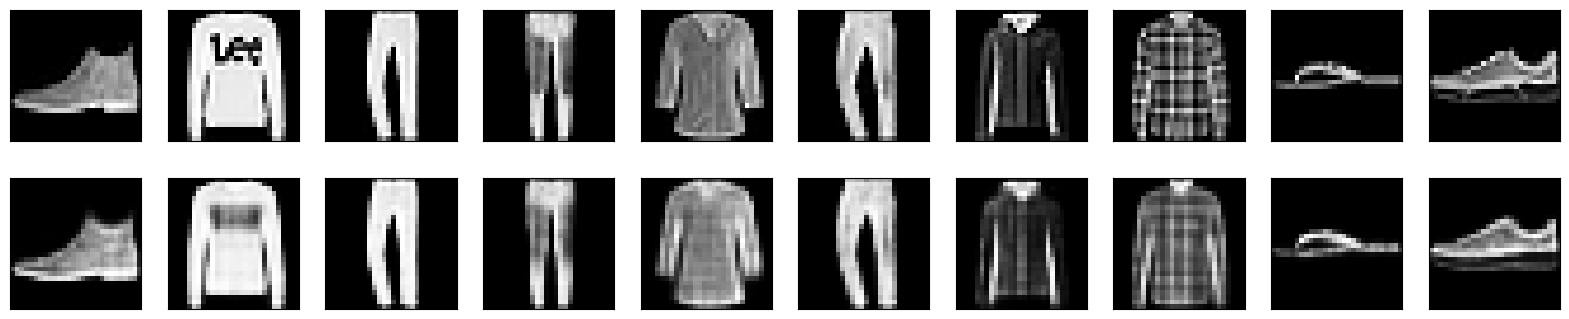

In [56]:
# Visualizando algumas imagens originais sem ruído e reconstruídas
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Imagem original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Imagem reconstruída
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(encoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

-> VALIDAÇÃO COM DADOS COM RUÍDO USANDO O MESMO MODELO TREINADO ORIGINAL

In [57]:
# Codificando e decodificando as imagens de teste com ruído
encoded_imgs = model.predict(x_test_noisy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


**-> GRÁFICO COMPARATIVO DE DADOS ORIGINAL E DADOS GERADOS EM FORMA DE IMAGEM - COM RUÍDO GERADO**

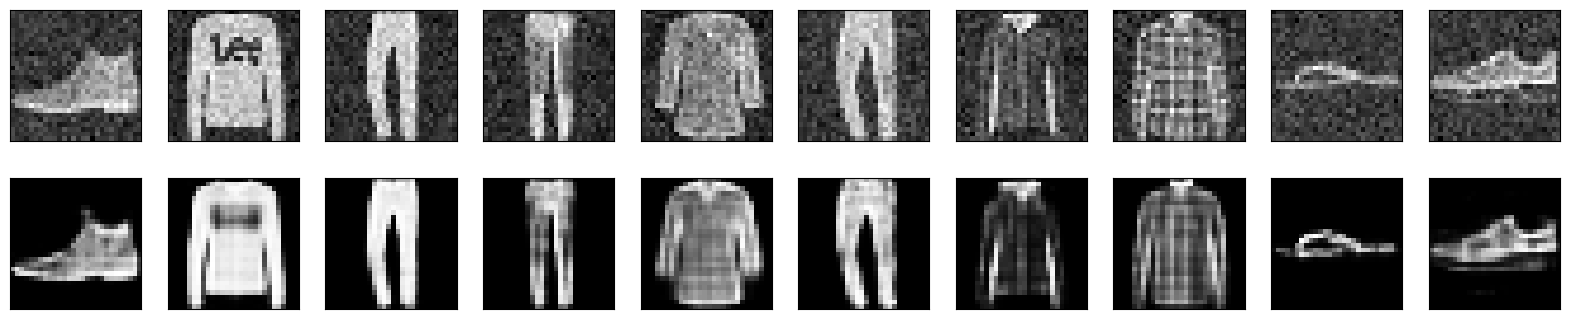

In [58]:
# Visualizando algumas imagens originais com ruído e reconstruídas
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Imagem de entrada com ruído
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Imagem reconstruída com redução do ruído
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(encoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

**-> CRIANDO UM MODELO DE CLASSIFICAÇÃO PARA TESTAR AS AMOSTRAS RUIDOSAS, AMOSTRAS ORIGINAIS E AS AMOSTRAS RECUPERADAS DO RUÍDO**

In [59]:
#dropout = 0.45
num_labels = len(np.unique(y_train))
model2 = Sequential()
model2.add(Dense(units=400, input_dim=x_train.shape[1], activation='relu'))
#model2.add(Dropout(dropout)) #Essa camada ajuda a evitar overfitting durante o treinamento, desligando aleatoriamente um certo número d
model2.add(Dense(units=100, activation='relu'))
#model2.add(Dropout(dropout))
model2.add(Dense(units=num_labels, activation='softmax'))
model2.compile(loss='sparse_categorical_crossentropy',
optimizer='adam',
metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [61]:
model2.fit(x_train, y_train, epochs=60, batch_size=256)

Epoch 1/60
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.9733 - loss: 0.0692
Epoch 2/60
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9781 - loss: 0.0588
Epoch 3/60
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9777 - loss: 0.0596
Epoch 4/60
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.9785 - loss: 0.0579
Epoch 5/60
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9792 - loss: 0.0544
Epoch 6/60
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9801 - loss: 0.0537
Epoch 7/60
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9786 - loss: 0.0567
Epoch 8/60
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9812 - loss: 0.0509
Epoch 9/60
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.9788 - loss: 0.0552
Epoch 10/60
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9799 - loss: 0.0525
Epoch 11/60
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9829 - loss: 0.0448
Epoch 12/60
235/235 ━━━━━━━━━━━━━━━━━━━━ 

In [62]:
loss, acc = model2.evaluate(x_test, y_test)
print("\nTeste de Acurácia Classificação sem Ruído: %.1f%%" % (100.0 * acc))
loss, acc = model2.evaluate(x_test_noisy, y_test)
print("\nTeste de Acurácia Classificação com Ruído: %.1f%%" % (100.0 * acc))
loss, acc = model2.evaluate(encoded_imgs, y_test)
print("\nTeste de Acurácia Classificação das Imagens Recuperadas do Ruído: %.1f%%" % (100.0 * acc))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8933 - loss: 0.8381

Teste de Acurácia Classificação sem Ruído: 89.4%
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8701 - loss: 1.1728

Teste de Acurácia Classificação com Ruído: 87.0%
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8646 - loss: 1.0941

Teste de Acurácia Classificação das Imagens Recuperadas do Ruído: 86.6%


**-> APRESENTANDO AS MÉTRICAS COM O SKLEARN**

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Avaliação da Classificação
Acurácia: 0.8942
MSE:  1.4453
Matriz de confusão das amostras não apresentadas no treinamento:
 [[853   2  19  16   2   2 102   0   4   0]
 [  4 984   1   7   2   0   1   0   1   0]
 [ 16   0 852   8  69   0  53   0   2   0]
 [ 22   5  18 873  46   1  30   0   5   0]
 [  1   1 107  16 803   0  70   0   2   0]
 [  0   0   0   1   0 965   0  17   1  16]
 [116   2  90  23  48   0 714   0   7   0]
 [  0   0   0   0   0  10   0 972   0  18]
 [  3   0   5   5   1   2  12   4 968   0]
 [  0   0   0   1   0   3   1  37   0 958]]

Relatório de classificação das amostras não apresentadas no treinamento:
              precision    recall  f1-score   support

           0       0.84      0.85      0.85      1000
           1       0.99      0.98      0.99      1000
           2       0.78      0.85      0.81      1000
           3       0.92      0.87      0.90      1000
           4       0.83      0.80      0.81      1000
      

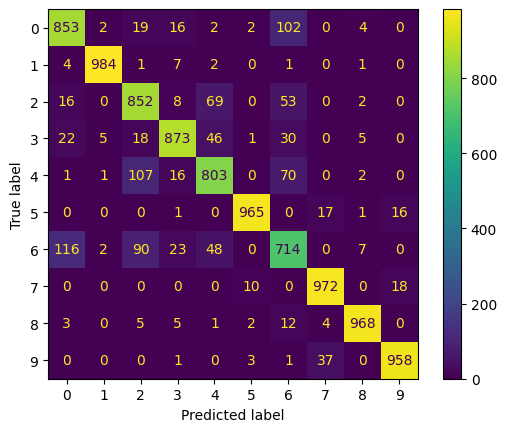

In [63]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix, classification_report, mean_squared_error, ConfusionMatrixDisplay

y_pred = model2.predict(x_test)

#Converter as previsões para classes
y_pred = np.argmax(y_pred, axis=1)

print("Avaliação da Classificação")
print("Acurácia:", accuracy_score(y_test, y_pred))
print("MSE: ", mean_squared_error(y_test, y_pred))
print(f"Matriz de confusão das amostras não apresentadas no treinamento:\n {confusion_matrix(y_test, y_pred)}")
print("")
relatorio = classification_report(y_test, y_pred, target_names=["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"])
print("Relatório de classificação das amostras não apresentadas no treinamento:")
print(relatorio)

print(f"Matriz de confusão das amostras não apresentadas no treinamento:\n {confusion_matrix(y_test, y_pred)}")
print("")
conf_matrix = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"])
cm_display.plot()
plt.show()